<a href="https://colab.research.google.com/github/Chhavidotcom/heart-disease-prediction/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing dependencies
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt #creating static, animated, and interactive visualizations
import seaborn as sns #data visualization

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


# **Reading and Visualization Data**

In [ ]:
import io
  
dataset = pd.read_csv(io.BytesIO(uploaded['heart_failure_clinical_records_dataset.csv']))
print(dataset)

      age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0    75.0        0                       582  ...        0     4            1
1    55.0        0                      7861  ...        0     6            1
2    65.0        0                       146  ...        1     7            1
3    50.0        1                       111  ...        0     7            1
4    65.0        1                       160  ...        0     8            1
..    ...      ...                       ...  ...      ...   ...          ...
294  62.0        0                        61  ...        1   270            0
295  55.0        0                      1820  ...        0   271            0
296  45.0        0                      2060  ...        0   278            0
297  45.0        0                      2413  ...        1   280            0
298  50.0        0                       196  ...        1   285            0

[299 rows x 13 columns]


In [ ]:
# Lets look at the top 5 rows

dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# **Exploratory Data Analysis**
the goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

* What question(s) are you trying to solve?
* What kind of data do we have and how do we treat different types?
* What's missing from the data and how do you deal with it?
* Where are the outliers and why should you care about them?
* How can you add, change or remove features to get more out of your data?







In [ ]:
#dimension of dataset
dataset.shape

(299, 13)

In [ ]:
# Checking for null values
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
#datatypes

dataset.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [ ]:
# columns name
dataset.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# returns the number of unique values for each variable.
dataset.nunique(axis=0)

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [ ]:
# summarizes the count, mean, standard deviation, min, and max for numeric variables.
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
# Display the Missing Values

print(dataset.isna().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


**Display the Number of Missing Values for each column. We luckily have none.**

In [ ]:
# Verifying it as a 'dataframe' object in pandas
type(dataset)

pandas.core.frame.DataFrame

### First, analysing the target  /death_event variable:

In [ ]:
dataset["DEATH_EVENT"].describe()

count    299.00000
mean       0.32107
std        0.46767
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: DEATH_EVENT, dtype: float64

In [ ]:
#Lets see if theirs a good proportion between our positive & negative binary predictor.
dataset['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

0    203
1     96
Name: DEATH_EVENT, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


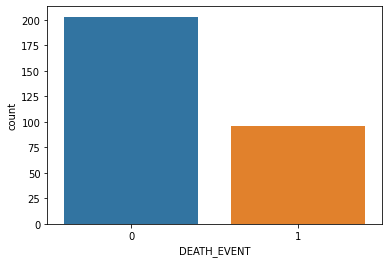

In [ ]:
y = dataset["DEATH_EVENT"]

sns.countplot(y)

DEATH_EVENT_temp = dataset.DEATH_EVENT.value_counts()

print(DEATH_EVENT_temp)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(DEATH_EVENT_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(DEATH_EVENT_temp[1]*100/303,2)))

Percentage of patience without heart problems: 67.0
Percentage of patience with heart problems: 31.68


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



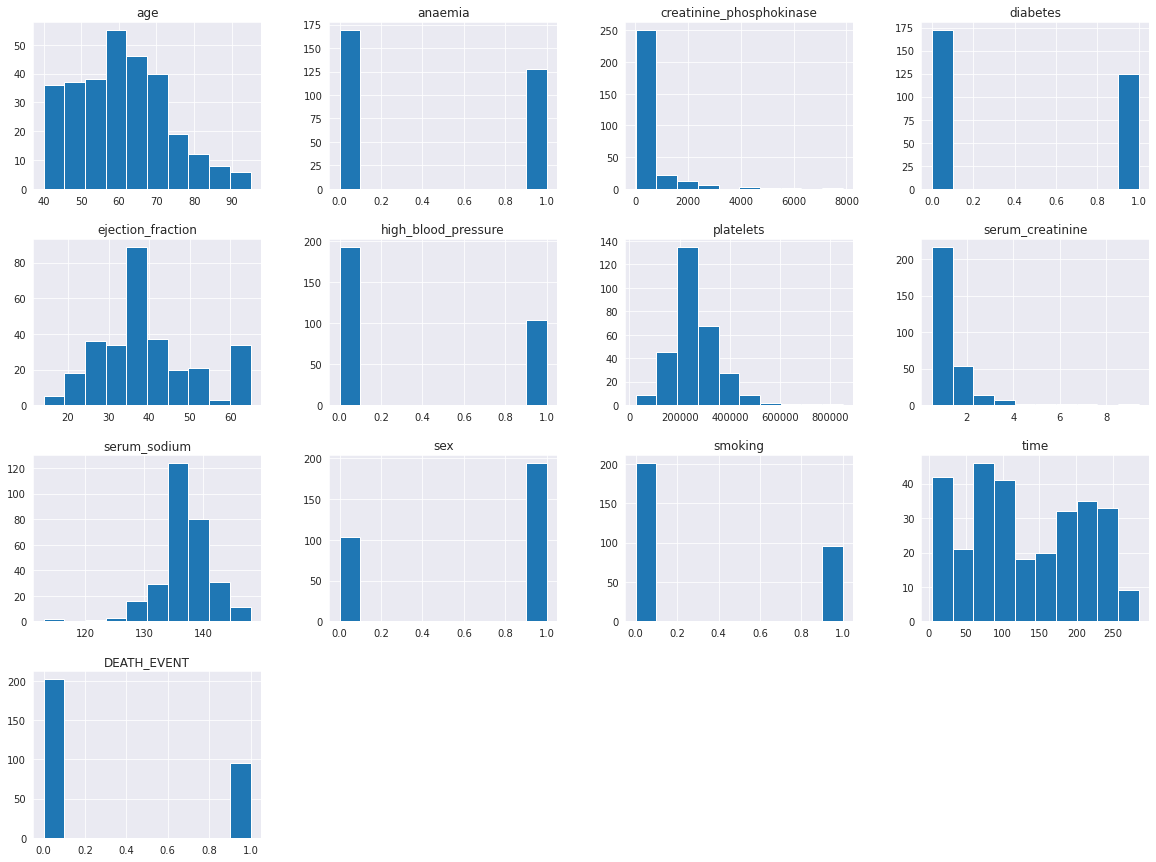

In [ ]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()

In [ ]:
dataset["sex"].unique()

array([1, 0])

In [ ]:
countFemale = len(dataset[dataset.sex == 0])
countMale = len(dataset[dataset.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(dataset.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(dataset.sex))*100))


Percentage of Female Patients:35.12%
Percentage of Male Patients:64.88%


**It appears we have a good balance between the two binary outputs**


**Clearly, this is a classification problem, with the target(DEATH_EVENT) variable having values '0' and '1'**

[0.09705888 0.02829483 0.07703646 0.0318476  0.12938653 0.02622442
 0.07315885 0.11664053 0.08517508 0.02891047 0.0239155  0.28235086]


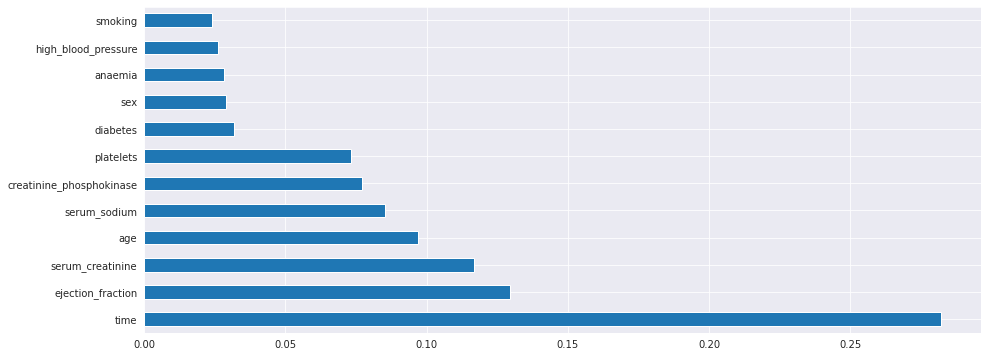

In [ ]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

***We will select only 3 features : time, ejection_fraction, serum_creatinine**

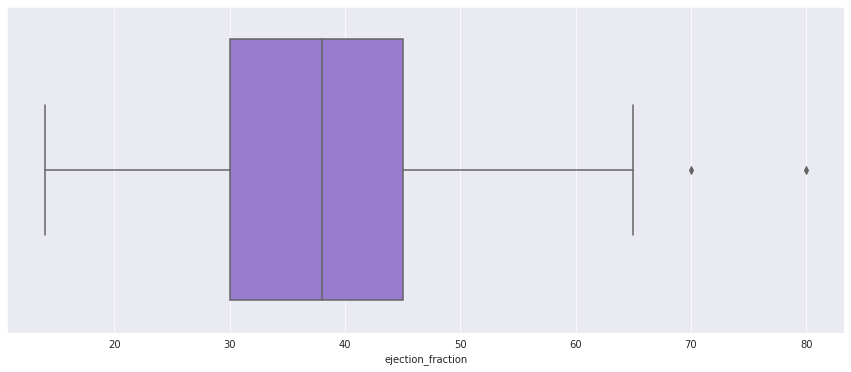

In [ ]:
# Boxplot for ejection_fraction

sns.boxplot(x = dataset.ejection_fraction, color = 'mediumpurple')
plt.show()

***We can see there are two outliers. Lets remove them***


In [ ]:
dataset[dataset['ejection_fraction']>=70]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [ ]:
dataset = dataset[dataset['ejection_fraction']<70]

**Finding outliers in time**

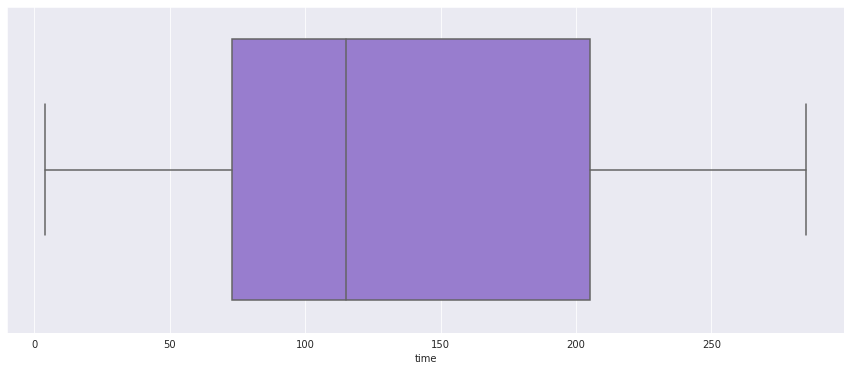

In [ ]:
sns.boxplot(x=dataset.time, color = 'mediumpurple')
plt.show()

***No outliers in time.***

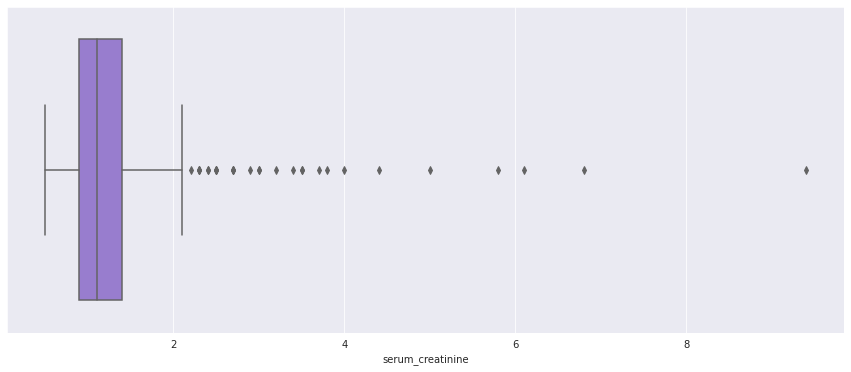

In [ ]:
# Boxplot for serum_creatinine
sns.boxplot(x=dataset.serum_creatinine, color = 'mediumpurple')
plt.show()

***LETS GET SOME INSIGHTS OF THE DATASET***

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['age'],
    xbins=dict( # bins used for histogram
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='AGE DISTRIBUTION',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

### However over the graph to get the count of people of different age groups 

In [ ]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="age", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "mediumpurple", "1": "lightpink"}
                  )
fig.show()

**Similarly lets get insights of other features as well**

In [ ]:
# Distribution of creatinine_phosphokinase

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['creatinine_phosphokinase'],
    xbins=dict( # bins used for histogram
        start=23,
        end=582,
        size=15
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='CREATININE PHOSPHOKINASE DISTRIBUTION',
    xaxis_title_text='CREATININE PHOSPHOKINASE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

### However over the graph to get the count of people having creatinine phosphokinase levels at same range

In [ ]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Distribution of CREATININE PHOSPHOKINASE Vs DEATH_EVENT", 
                   labels={"creatinine_phosphokinase": "CREATININE PHOSPHOKINASE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [ ]:
# Distribution of ejection_fraction

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['ejection_fraction'],
    xbins=dict( # bins used for histogram
        start=14,
        end=80,
        size=2
    ),
    marker_color='mediumpurple',
    opacity=1
))

fig.update_layout(
    title_text='EJECTION FRACTION DISTRIBUTION',
    xaxis_title_text='EJECTION FRACTION',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()


In [ ]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Distribution of EJECTION FRACTION Vs DEATH_EVENT", 
                   labels={"ejection_fraction": "EJECTION FRACTION"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [ ]:
# Distribution of platelets

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['platelets'],
    xbins=dict( # bins used for histogram
        start=25000,
        end=300000,
        size=5000
    ),
    marker_color='#50BFE6',
    opacity=1
))

fig.update_layout(
    title_text='PLATELETS DISTRIBUTION',
    xaxis_title_text='PLATELETS',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [ ]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Distribution of PLATELETS Vs DEATH_EVENT", 
                   labels={"platelets": "PLATELETS"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [ ]:
# Distribution of serum_creatinine

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['serum_creatinine'],
    xbins=dict( # bins used for histogram
        start=0.5,
        end=9.4,
        size=0.2
    ),
    marker_color='#E77200',
    opacity=1
))

fig.update_layout(
    title_text='SERUM CREATININE DISTRIBUTION',
    xaxis_title_text='SERUM CREATININE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [ ]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Distribution of SERUM CREATININE Vs DEATH_EVENT", 
                   labels={"serum_creatinine": "SERUM CREATININE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [ ]:
# Distribution of serum_sodium

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = dataset['serum_sodium'],
    xbins=dict( # bins used for histogram
        start=113,
        end=148,
        size=1
    ),
    marker_color='#AAF0D1',
    opacity=1
))

fig.update_layout(
    title_text='SERUM SODIUM DISTRIBUTION',
    xaxis_title_text='SERUM SODIUM',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [ ]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(dataset, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of SERUM SODIUM Vs DEATH_EVENT", 
                   labels={"serum_sodium": "SERUM SODIUM"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["sex"]==1)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["sex"]==1)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["sex"]==0)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

Insight: From the above subplot we can conclude that in our dataset 65.3% are MALE (out of which 44.4% survived and 20.9% died) and 34.7% are FEMALE (out of which 23.6% survived and 11.1% died)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["diabetes"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["diabetes"]==1)]
d3 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["diabetes"]==0)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["diabetes"]==1)]

label1 = ["No Diabetes","Diabetes"]
label2 = ['No Diabetes - Survived','Diabetes - Survived', "No Diabetes -  Died", "Diabetes  - Died"]
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="DIABETES"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="DIABETES VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="DIABETES DISTRIBUTION IN THE DATASET \
                  DIABETES VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='DIABETES', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='DIABETES VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

#### Insight:From the above subplot we can conclude that in our dataset 57.9% are NON DIABETIC (out of which 39.4% survived and 18.5% died) and 42.1% are DIABETIC (out of which 28.6% survived and 13.5% died).

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["anaemia"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["anaemia"]==0)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["anaemia"]==1)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["anaemia"]==1)]

label1 = ["No Anaemia","Anaemia"]
label2 = ['No Anaemia - Survived','No Anaemia - Died', "Anaemia -  Survived", "Anaemia  - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="ANAEMIA"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="ANAEMIA VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="ANAEMIA DISTRIBUTION IN THE DATASET \
                  ANAEMIA VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='ANAEMIA', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='ANAEMIA VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

#### Insight:From the above subplot we can conclude that in our dataset 56.9% are NON ANAEMIC (out of which 40.1% survived and 16.8% died) and 43.1% are ANAEMIC (out of which 27.9% survived and 15.2% died).

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["high_blood_pressure"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["high_blood_pressure"]==0)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["high_blood_pressure"]==1)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["high_blood_pressure"]==1)]

label1 = ["No High BP","High BP"]
label2 = ['No High BP - Survived','No High BP - Died', "High BP -  Survived", "High BP  - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="HIGH BP"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="HIGH BP VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="HIGH BP DISTRIBUTION IN THE DATASET \
                  HIGH BP VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='HIGH BP', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='HIGH BP VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["smoking"]==0)]
d2 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["smoking"]==0)]
d3 = dataset[(dataset["DEATH_EVENT"]==0) & (dataset["smoking"]==1)]
d4 = dataset[(dataset["DEATH_EVENT"]==1) & (dataset["smoking"]==1)]

label1 = ["No Smoking","Smoking"]
label2 = ['No Smoking - Survived','No Smoking - Died', "Smoking - Survived", "Smoking - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="SMOKING"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="SMOKING VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="SMOKING DISTRIBUTION IN THE DATASET \
                  SMOKING VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='SMOKING', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='SMOKING VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

#### Insight:From the above subplot we can conclude that in our dataset 67.7% do not SMOKE (out of which 45.8% survived and 21.9% died) and 32.3% do SMOKE (out of which 22.2% survived and 10.1% died).

In [ ]:
# "Distribution of AGE Vs DIABETES"
import plotly.express as px
fig = px.histogram(dataset, x="age", color="diabetes", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of AGE Vs DIABETES", 
                   labels={"diabetes": "DIABETES", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [ ]:
# "Distribution of AGE Vs ANAEMIA"
import plotly.express as px
fig = px.histogram(dataset, x="age", color="anaemia", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of AGE Vs ANAEMIA", 
                   labels={"anaemia": "ANAEMIA", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [ ]:
# "Distribution of AGE Vs HIGH BLOOD PRESSURE"
import plotly.express as px
fig = px.histogram(dataset, x="age", color="high_blood_pressure", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of AGE Vs HIGH BLOOD PRESSURE", 
                   labels={"high_blood_pressure": "HIGH BLOOD PRESSURE", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [ ]:
# "Distribution of AGE Vs SMOKING"
import plotly.express as px
fig = px.histogram(dataset, x="age", color="smoking", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of AGE Vs SMOKING", 
                   labels={"smoking": "SMOKING", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [ ]:
x = dataset.iloc[:, [4,7,11]].values
y = dataset.iloc[:,-1].values

In [ ]:
print(x)

[[ 20.     1.9    4.  ]
 [ 38.     1.1    6.  ]
 [ 20.     1.3    7.  ]
 [ 20.     1.9    7.  ]
 [ 20.     2.7    8.  ]
 [ 40.     2.1    8.  ]
 [ 15.     1.2   10.  ]
 [ 60.     1.1   10.  ]
 [ 65.     1.5   10.  ]
 [ 35.     9.4   10.  ]
 [ 38.     4.    10.  ]
 [ 25.     0.9   10.  ]
 [ 30.     1.1   11.  ]
 [ 38.     1.1   11.  ]
 [ 30.     1.    12.  ]
 [ 50.     1.3   13.  ]
 [ 38.     0.9   14.  ]
 [ 14.     0.8   14.  ]
 [ 25.     1.    15.  ]
 [ 55.     1.9   15.  ]
 [ 25.     1.3   16.  ]
 [ 30.     1.6   20.  ]
 [ 35.     0.9   20.  ]
 [ 60.     0.8   22.  ]
 [ 30.     1.83  23.  ]
 [ 38.     1.9   23.  ]
 [ 40.     1.    24.  ]
 [ 45.     1.3   26.  ]
 [ 38.     5.8   26.  ]
 [ 30.     1.2   26.  ]
 [ 38.     1.83  27.  ]
 [ 45.     3.    28.  ]
 [ 35.     1.    28.  ]
 [ 30.     1.2   29.  ]
 [ 50.     1.    29.  ]
 [ 35.     3.5   30.  ]
 [ 50.     1.    30.  ]
 [ 50.     1.    30.  ]
 [ 30.     2.3   30.  ]
 [ 38.     3.    30.  ]
 [ 20.     1.83  31.  ]
 [ 30.     1.2  

In [ ]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


# ***Correlation Matrix***

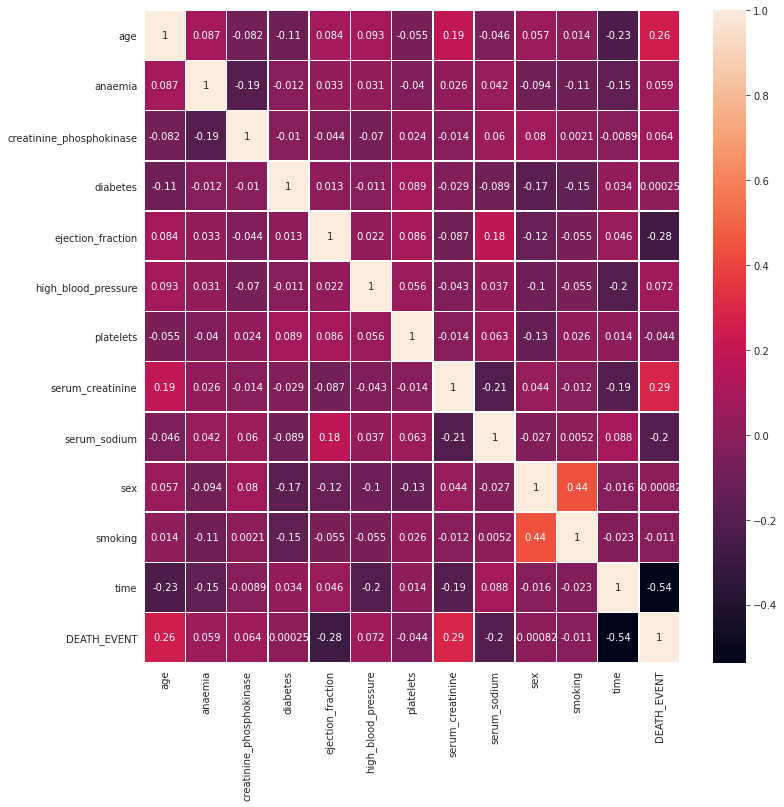

In [ ]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(dataset.corr(),annot=True, linewidths=.5, ax=ax)
plt.show()

In [ ]:
cor = dataset.corr() 
corr_target = abs(cor["DEATH_EVENT"])
relevant_features = corr_target[corr_target>0.1]
relevant_features

age                  0.255490
ejection_fraction    0.284516
serum_creatinine     0.286439
serum_sodium         0.196280
time                 0.536734
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

# Train and Test Split
I splitted as 20% test dataset and 80% train dataset.

In [ ]:
# Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

In [ ]:
print(x_train)

[[ 40.     0.8  250.  ]
 [ 25.     2.5   77.  ]
 [ 35.     1.3   88.  ]
 [ 60.     1.   113.  ]
 [ 35.     0.7  197.  ]
 [ 25.     1.3   16.  ]
 [ 25.     0.9   38.  ]
 [ 35.     0.8  120.  ]
 [ 60.     1.4  205.  ]
 [ 35.     1.1  208.  ]
 [ 45.     1.3   26.  ]
 [ 20.     1.83 198.  ]
 [ 25.     0.8  230.  ]
 [ 50.     1.    30.  ]
 [ 25.     1.7   82.  ]
 [ 40.     1.2  121.  ]
 [ 45.     1.    80.  ]
 [ 40.     0.9  244.  ]
 [ 50.     1.3  121.  ]
 [ 35.     1.8  186.  ]
 [ 30.     1.3  212.  ]
 [ 50.     1.1  209.  ]
 [ 40.     1.2   74.  ]
 [ 25.     1.   205.  ]
 [ 40.     1.   140.  ]
 [ 35.     1.   206.  ]
 [ 25.     1.2   85.  ]
 [ 60.     1.1   33.  ]
 [ 35.     1.3  212.  ]
 [ 25.     1.2  154.  ]
 [ 35.     0.8  145.  ]
 [ 40.     1.   147.  ]
 [ 38.     2.2   45.  ]
 [ 60.     0.9  107.  ]
 [ 25.     1.    15.  ]
 [ 45.     0.9  174.  ]
 [ 25.     2.4  214.  ]
 [ 60.     3.2   94.  ]
 [ 38.     1.83  95.  ]
 [ 35.     1.    72.  ]
 [ 35.     1.   108.  ]
 [ 35.     1.1  

In [ ]:
print(y_test)

[0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Create Model
In this section, accuracy values and the number of patient, which predicted, of the models,which I set up,is seen. Accuracy value is not enough in order to set up actual model. Sometimes, low accuracy value models can predict more actual result than high accuracy value. You see all models comparisons in below. The algorithm I have used:

## **1.LOGISTIC REGRESSION**

In [ ]:
# Applying logistic regression on the training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicting the test set

y_pred = classifier.predict(x_test)

[[40  3]
 [ 4 13]]
0.8833333333333333


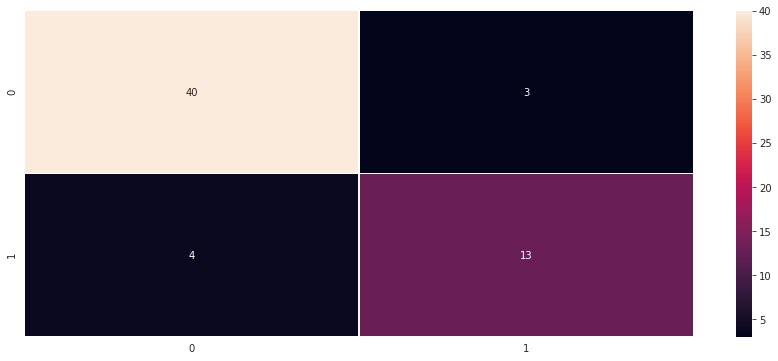

In [ ]:
# Making Confusion Matrix and calculating accuracy score

mylist = []
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

cm = confusion_matrix(y_test,classifier.predict(x_test))

sns.heatmap(cm,annot=True, linewidths=.5)
plt.show()

### **The accuracy score achieved using Logistic Regression is: accuracy 88%**

# **K NEAREST NEIGHBOR**

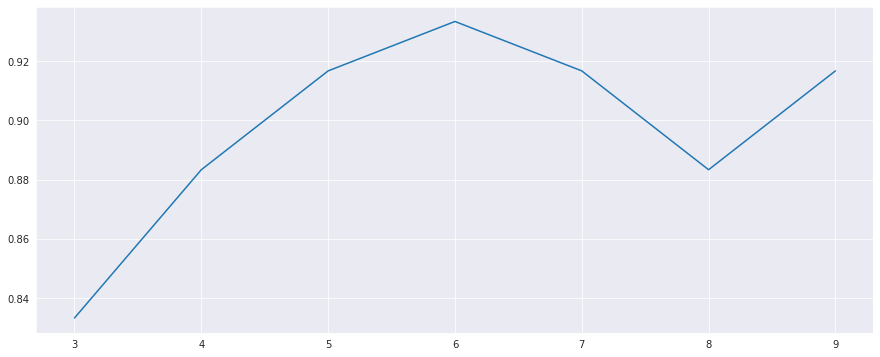

In [ ]:
# Finding the optimum number of neighbors 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(3,10)), list1)
plt.show()

In [ ]:
# Training the K Nearest Neighbor Classifier on the Training set

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
# Predicting the Test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


[[42  1]
 [ 3 14]]
0.9333333333333333


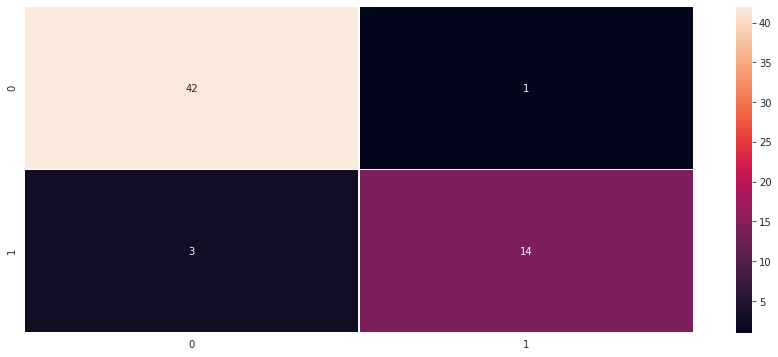

In [ ]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)
cm = confusion_matrix(y_test,classifier.predict(x_test))

sns.heatmap(cm,annot=True, linewidths=.5)
plt.show()

### **The accuracy score achieved using KNN is: 93%**

# **RANDOM FOREST CLASSIFCATION**

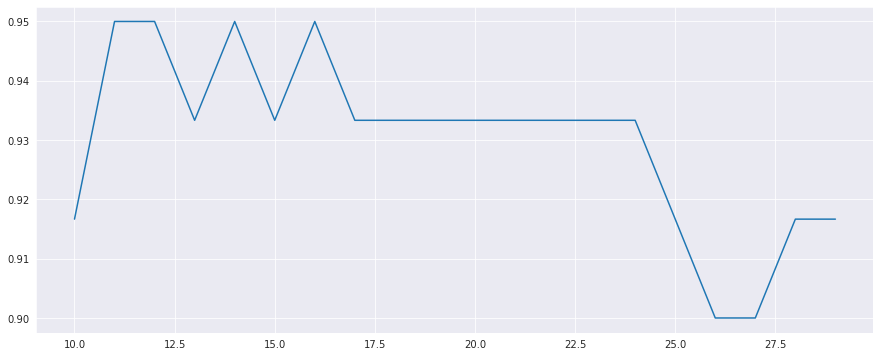

In [ ]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [ ]:
# Training the RandomForest Classifier on the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 11, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0]


[[41  2]
 [ 1 16]]
0.95


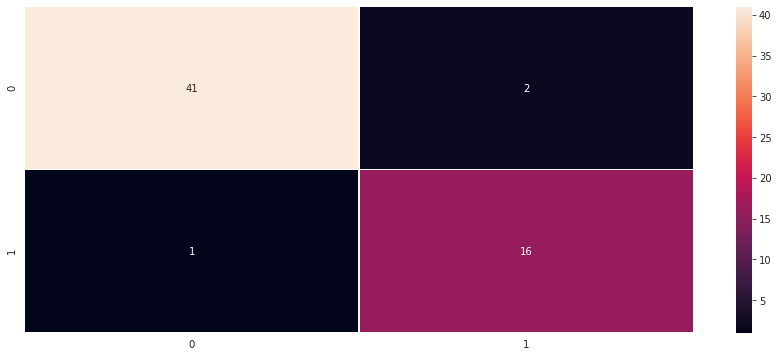

In [ ]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)
cm = confusion_matrix(y_test,classifier.predict(x_test))

sns.heatmap(cm,annot=True, linewidths=.5)
plt.show()

**The accuracy score achieved using Decision Tree is:95%**

# **SUPPORT VECTOR CLASSIFIER**

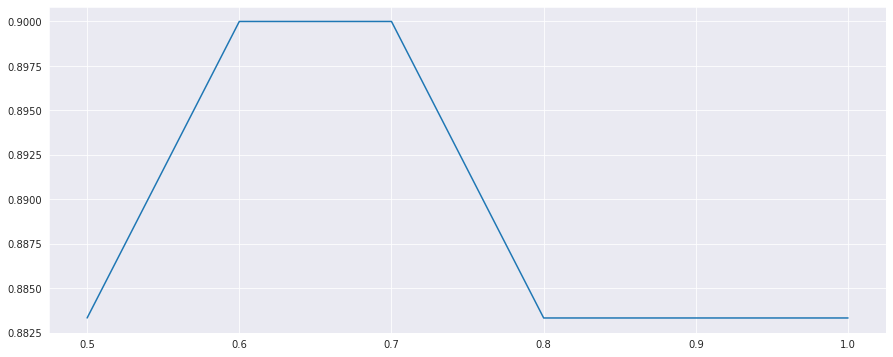

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
plt.show()

In [ ]:
# Training the Support Vector Classifier on the Training set

from sklearn.svm import SVC
classifier = SVC(C = 0.6, random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)

SVC(C=0.6, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0]


[[40  3]
 [ 3 14]]
0.9


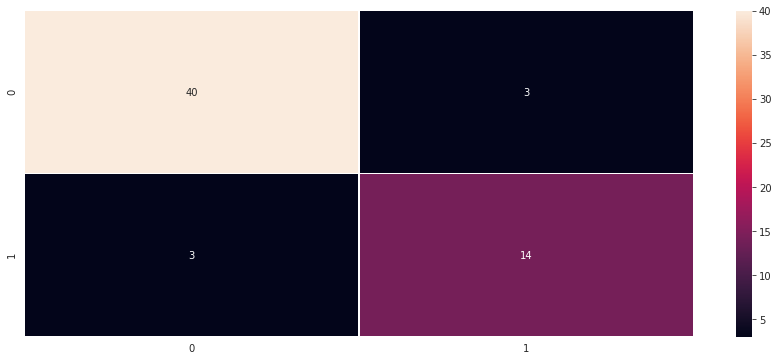

In [ ]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)
mylist.append(ac)

cm = confusion_matrix(y_test,classifier.predict(x_test))

sns.heatmap(cm,annot=True, linewidths=.5)
plt.show()


**The accuracy score achieved using Linear SVM is:90%**

In [ ]:
mylist

[0.8833333333333333, 0.9333333333333333, 0.95, 0.9]

In [ ]:
mylist2 = ["LogisticRegressionn", "KNearestNeighbours","RandomForest","SupportVectorClassifier"]

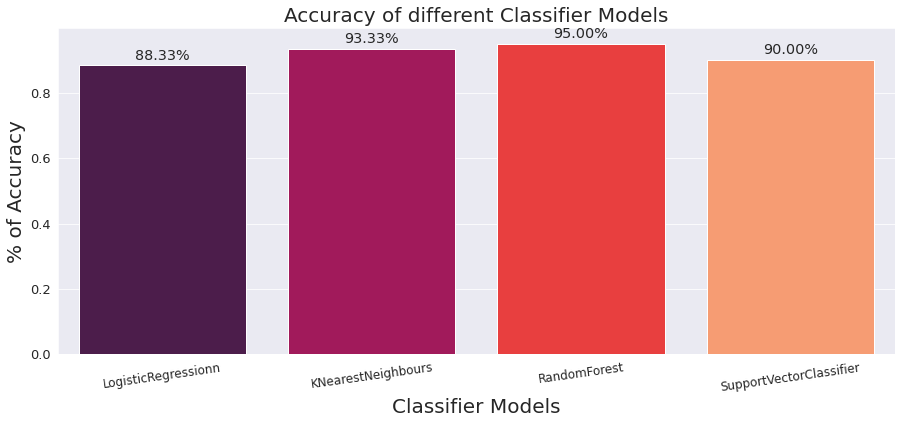

In [ ]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

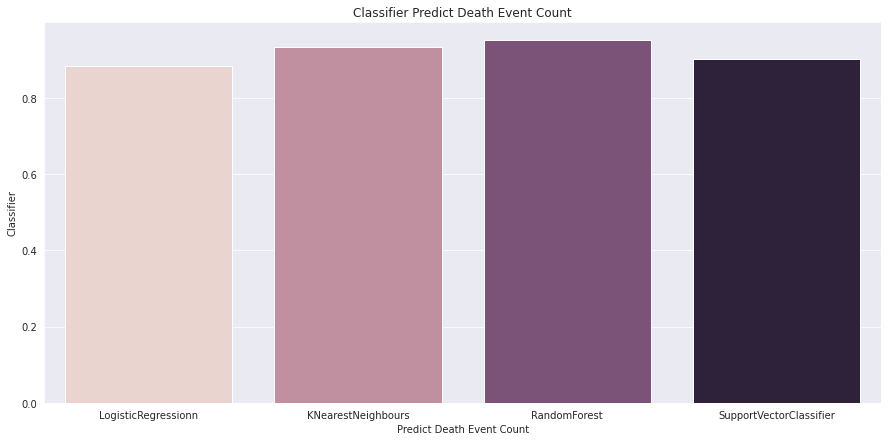

In [ ]:
#Classifier Predict Death Event Count
f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x=mylist2,y=mylist,palette = sns.cubehelix_palette(len(mylist)))
plt.xlabel("Predict Death Event Count")
plt.ylabel("Classifier")
plt.title('Classifier Predict Death Event Count')
plt.show()